# Homework 2

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

## EDA

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

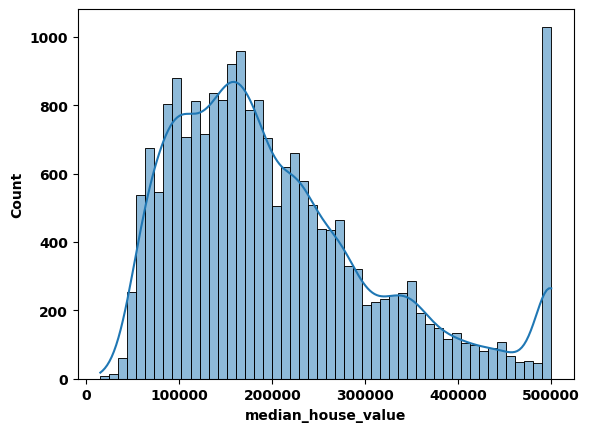

In [6]:
sns.histplot(df['median_house_value'], bins=50, kde=True);

It does not have long tail, but it's right skewed

## Preparing the Dataset

In [7]:
# keeping only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'
subset = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]

used_cols = [
    'latitude', 'longitude', 'housing_median_age',
    'total_rooms', 'total_bedrooms', 'population',
    'households', 'median_income', 'median_house_value'
]

df_sub = subset[used_cols].reset_index(drop=True)
df_sub

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
15682,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
15683,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
15684,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
15685,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


## Question 1 - Missing Values

Column with missing values

In [8]:
df_sub.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

The column with missing values is: __total_bedrooms__

## Question 2 - Median

In [9]:
median_value = df_sub['population'].median()

print("median value of `population` is :", median_value)

median value of `population` is : 1195.0


__The Median value = 1195.00000__

## Prepare and split the dataset

In [10]:
def split_dataset(df):
    
    
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    # Shuffling the dataset to remove any preconcieved arrangement
    idx = np.arange(n)

    np.random.seed(42)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    # resseting the original index numbers
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # creating the target variable for train, validation and testing
    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)

    #deleting the target variables from the dataset, so as to avoid overfitting
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    return df_train, df_val, df_test, y_train, y_val, y_test

In [11]:
df_train, df_val, df_test, y_train, y_val, y_test = split_dataset(df_sub)

In [12]:
len(df_sub) == len(df_train) + len(df_val) + len(df_test)

True

## Question 3 - Missing Values

### Baseline model

In [13]:
df_train.dtypes

latitude              float64
longitude             float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
dtype: object

Since all columns are numerical columns, I'll set my base to all the columns above

In [14]:
base = df_train.columns
base

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [15]:
X_train = df_train[base].values
X_train

array([[ 3.6230e+01, -1.1914e+02,  2.2000e+01, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [ 3.4120e+01, -1.1779e+02,  1.6000e+01, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [ 3.3680e+01, -1.1797e+02,  2.6000e+01, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [ 3.4130e+01, -1.1808e+02,  4.6000e+01, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [ 3.4290e+01, -1.1846e+02,  2.4000e+01, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00],
       [ 3.4000e+01, -1.1841e+02,  1.8000e+01, ...,  8.8400e+02,
         4.5600e+02,  2.9338e+00]])

## Filling the null values

### I start with filling with 0's

In [16]:
# Filling with 0's
X_train_0 = df_train[base].fillna(0).values

### Using the X_train with 0's to train a linear regression model

#### Training a Linear Regression Model

In [17]:
# defining a function for training my linear regression model

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [18]:
w0, w = train_linear_regression(X_train_0, y_train)

In [19]:
y_pred_0 = w0 + X_train_0.dot(w)

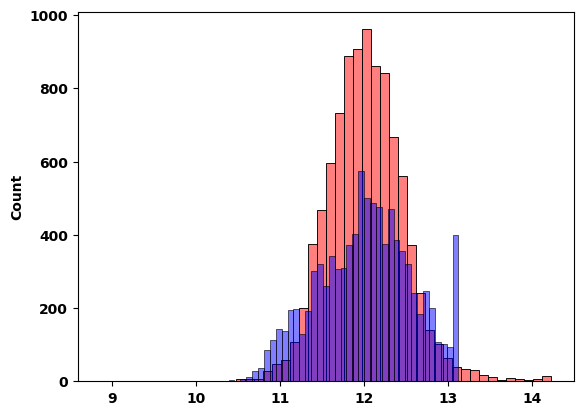

In [20]:
sns.histplot(y_pred_0, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50);

The above plot shows that our prediction from the 0 filled `X_train` mostly higher than the `y_train`

#### Computing the RMSE

In [21]:
# defining the `rmse` function
def rmse(y, pred):
    se = (y - pred) ** 2
    mse = np.mean(se)
    return np.sqrt(mse)

In [22]:
round(rmse(y_train, y_pred_0), 2)

0.34

##### Validating the model

In [23]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [24]:
X_val_0 = prepare_X(df_val)y_pred_0 = w0 + X_val_0.dot(w)

# RMSE
round(rmse(y_val, y_pred_0), 2)

0.34

### Filling with mean values

In [25]:
mean_values = df_train.mean()

X_train_m = df_train[base].fillna(mean_values).values

#### Training a Linear Regression Model

In [26]:
w0_m, w_m = train_linear_regression(X_train_m, y_train)

In [27]:
y_pred_m = w0_m + X_train_0.dot(w_m)

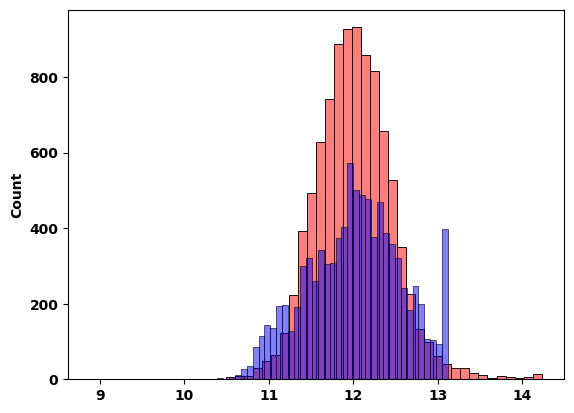

In [28]:
sns.histplot(y_pred_m, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50);

The above plot shows that our prediction from the mean filled `X_train` mostly higher than the `y_train`, which is similar to the 0 filled

#### Obtaining the RMSE

In [29]:
round(rmse(y_train, y_pred_m), 2)

0.34

#### Validating the model

In [30]:
def prepare_X_m(df):
    df_num = df[base]
    df_num = df_num.fillna(mean_values)
    X = df_num.values
    return X

In [31]:
X_val_m = prepare_X_m(df_val)
y_pred_m = w0 + X_val_m.dot(w)

# RMSE
round(rmse(y_val, y_pred_m), 2)

0.34

#### Both options give the same score.

## Question 4 - Regulazrization

In [32]:
def train_linear_regression_reg(X, y, r): # r, here is regulirization
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [33]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [34]:
best_r = None
best_score = float('inf')  # Initialize with positive infinity to ensure any RMSE will be smaller

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    if score < best_score:
        best_score = score
        best_r = r
    
    print(r, w0, score)

0 -9.763249480961484 0.3408479034170524
1e-06 -9.763228834412654 0.3408479061769051
0.0001 -9.76118523895649 0.34084818005444284
0.001 -9.742646252554156 0.34085069218976816
0.01 -9.561056196474489 0.34087793004503447
0.1 -8.05888977211378 0.3412862041967035
1 -3.133154279369632 0.3448958327629285
5 -0.8410867977013567 0.3477398070477501
10 -0.43811723165904154 0.3483149833517867


#### All score are close when rounded up to 2d.p, but when rounded to 9d.p, `r = 0.0` and `r = 0.000001` appears to be the best respectively. So, I'll select `r = 0`, which is the smallest!

In [35]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=best_r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.3408479034170524

## Question 5

In [50]:
# Define a function to train and evaluate a model
def train_and_evaluate(seed, df):

    # Dividing the dataset
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    # Shuffling the dataset to remove any preconcieved arrangement
    idx = np.arange(n)

    np.random.seed(seed)
    np.random.shuffle(idx)

    # setting values for train, val, test
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    # resseting the original index numbers
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # creating the target variable for train, validation and testing
    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)

    #deleting the target variables from the dataset, so as to avoid overfitting
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    # Filling with 0s
    X_train = df_train.fillna(0).values
    
    # Performing Linear Regression
    ones = np.ones(X_train.shape[0])
    X_train = np.column_stack([ones, X_train])
    
    XTX = X_train.T.dot(X_train)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X_train.T).dot(y_train)
    
    w0 = w_full[0]
    w = w_full[1:]
    
    # Filling X_val with 0s
    X_val = df_val.fillna(0).values
    
    # Make predictions on the validation set
    y_pred = w0 + X_val.dot(w)
    
    # RMSE
    se = (y_val - y_pred) ** 2
    mse = np.mean(se)
    rmse_scores = np.sqrt(mse)


    return rmse_scores

In [51]:
# Initialize an empty list to collect RMSE scores
rmse_scores = []

# Seed values to test
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for seed in seeds:
    # Split the dataset and evaluate the model
    rmse_score = train_and_evaluate(seed, df_sub)
    rmse_scores.append(round(rmse_score, 3))
    
rmse_scores

[0.338, 0.338, 0.338, 0.332, 0.339, 0.343, 0.339, 0.347, 0.351, 0.334]

In [52]:
# Calculate the standard deviation of RMSE scores
std_dev = np.std(rmse_scores)

# Round the result to 3 decimal digits
std_dev = round(std_dev, 3)

print("Standard Deviation of RMSE Scores:", std_dev)

Standard Deviation of RMSE Scores: 0.005


## Question 6

## Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?


Options:

0.13
0.23
0.33
0.43

In [53]:
def split_dataset(df):
    
    
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    # Shuffling the dataset to remove any preconcieved arrangement
    idx = np.arange(n)

    np.random.seed(9)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    # resseting the original index numbers
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # creating the target variable for train, validation and testing
    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)

    #deleting the target variables from the dataset, so as to avoid overfitting
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    return df_train, df_val, df_test, y_train, y_val, y_test

In [54]:
df_train, df_val, df_test, y_train, y_val, y_test = split_dataset(df_sub)

In [56]:
# Concatenating both train and val dataset
df_full_train = pd.concat([df_train, df_val])

In [57]:
df_full_train= df_full_train.reset_index(drop=True)

In [59]:
def prepare_X_m(df):
    df_num = df[base]
    df_num = df_num.fillna(mean_values)
    X = df_num.values
    return X

In [60]:
X_full_train = prepare_X(df_full_train)

In [61]:
y_full_train = np.concatenate([y_train, y_val])

In [62]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [64]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
rmse_score = round(rmse(y_test, y_pred), 2)
rmse_score

0.33